In [2]:
#import libaraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
data  = pd.read_csv("./DataSet/train.csv")

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
data["Sex"] = data["Sex"].map({"male": 1, "female": 0}) #male = 1, female = 0
data["Embarked"] = data["Embarked"].map({"S": 0, "C": 1, "Q": 2}) #S = 0, C = 1, Q = 2

In [11]:
data.drop(["Name", "Ticket", "Cabin", "PassengerId"], axis = 1, inplace = True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


<Axes: >

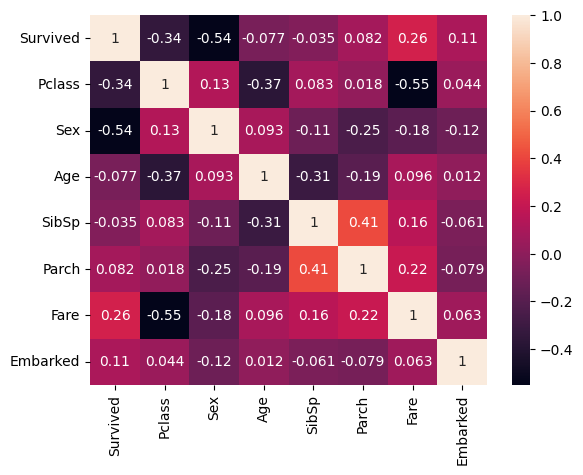

In [14]:
correlation_matrix = data.corr()

sns.heatmap(correlation_matrix, annot = True)

##### Very less correlation of survived(y-varible) on SibSp and Parch, droping both as well

In [15]:
data.drop(["SibSp", "Parch"], axis = 1, inplace = True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  889 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 41.9 KB


In [20]:
data

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.0,7.2500,0.0
1,1,1,0,38.0,71.2833,1.0
2,1,3,0,26.0,7.9250,0.0
3,1,1,0,35.0,53.1000,0.0
4,0,3,1,35.0,8.0500,0.0
...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,0.0
887,1,1,0,19.0,30.0000,0.0
888,0,3,0,NaN,23.4500,0.0
889,1,1,1,26.0,30.0000,1.0


In [22]:
## count null 
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    2
dtype: int64

In [21]:
data["Age"] = data["Age"].fillna(data["Age"].mean())

In [23]:
data.shape

(891, 6)

In [24]:
data.dropna(inplace = True)

In [25]:
data.shape

(889, 6)

In [26]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

<Axes: >

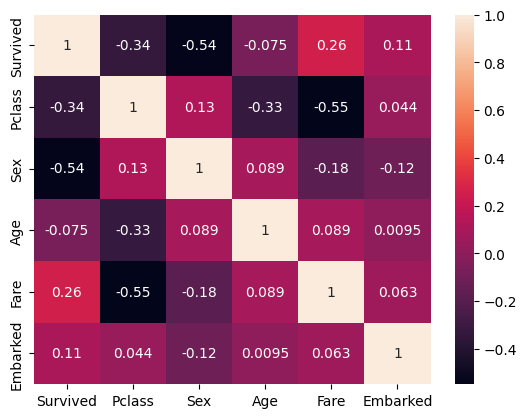

In [27]:
correlation_matrix = data.corr()

sns.heatmap(correlation_matrix, annot = True)

In [29]:
## feature selection
X = data.drop(["Survived"], axis = 1)
y = data["Survived"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
# prediction
y_pred = rfc.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8033707865168539
[[87 22]
 [13 56]]


In [35]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7752808988764045
[[86 23]
 [17 52]]


In [36]:
# SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.6741573033707865
[[100   9]
 [ 49  20]]


In [37]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.6966292134831461
[[91 18]
 [36 33]]


In [38]:
# Naive bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7865168539325843
[[86 23]
 [15 54]]


In [39]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7752808988764045
[[83 26]
 [14 55]]


In [40]:
# Neural network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8146067415730337
[[94 15]
 [18 51]]


C:\Users\alisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [42]:
!pip install xgboost

^C


   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 7.0 MB/s eta 0:00:15
   ---------------------------------------- 0.3/99.8 MB 3.5 MB/s eta 0:00:29
   ---------------------------------------- 0.5/99.8 MB 3.7 MB/s eta 0:00:27
   ---------------------------------------- 0.7/99.8 MB 4.1 MB/s eta 0:00:25
   ---------------------------------------- 0.8/99.8 MB 4.4 MB/s eta 0:00:23
   ---------------------------------------- 1.0/99.8 MB 4.1 MB/s eta 0:00:25
   ---------------------------------------- 1.0/99.8 MB 3.1 MB/s eta 0:00:32
   ---------------------------------------- 1.1/99.8 MB 3.1 MB/s eta 0:00:32
   ---------------------------------------- 1.2/99.8 MB 2.9 MB/s eta 0:00:34
   ---------------------------------------- 1.2/99.8 MB 2.9 MB/s eta 0:00:34
    --------------------------------------- 1.3/99.8 MB 2.7 MB/s eta 0:00:37
    --------------------------------------- 1.4/99.8 MB 2.6 MB/s eta 0:00:38
    --

In [41]:
# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

ModuleNotFoundError: No module named 'xgboost'